(206,)


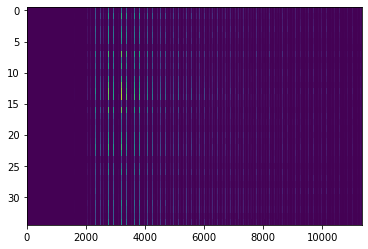


(30, 11330)
(30, 3)
Gominy    17.700965
Tyr        0.152371
Trp        0.091514
dtype: float64
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 4, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 5, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 6, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 7, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 8, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 9, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 10, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_co

In [77]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
parametrsNames=[{'ee':string_name2}]

pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,100), 
    'scale': [True], 
    'tol': [1e-06]
}
gridCought=GridSearchCV(pls2, parametrsNames)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)

print(gridCought.best_params_)

cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


In [68]:
predictors.shape

(5, 3)

In [71]:
type(y_test)

pandas.core.frame.DataFrame

In [73]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[48.71776277 39.30983219 39.72902876 49.42186995 35.0537506 ]
18    43.272738
20    34.193088
26    36.909160
0     45.446791
8     35.354605
Name: Gominy, dtype: float64


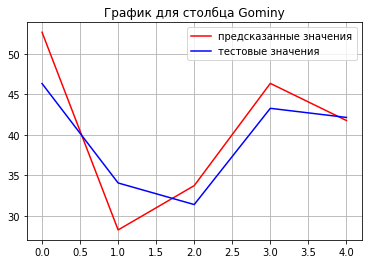

In [80]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors[:,0],color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();
